In [1]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Montar Google Drive
drive.mount('/content/drive')

# Cargar el dataset
file_path = '/content/drive/My Drive/Grupo 5 Utec/Machine Learning/DataSet/housing.csv'  # Actualiza la ruta según sea necesario

# Leer el archivo CSV sin nombres de columna
df = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Asignar nombres de columna manualmente
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df.columns = column_names

# Mostrar las primeras filas para verificar que se ha cargado correctamente
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
#Valores nulos
null_counts = df.isnull().sum()
null_counts_str = ', '.join([f'{col}: {count}' for col, count in null_counts.items()])
print(null_counts_str)

CRIM: 0, ZN: 0, INDUS: 0, CHAS: 0, NOX: 0, RM: 0, AGE: 0, DIS: 0, RAD: 0, TAX: 0, PTRATIO: 0, B: 0, LSTAT: 0, MEDV: 0


In [9]:
df.describe()

# Mostrar los valores únicos para cada columna
unique_values = {col: df[col].unique() for col in df.columns}

# Mostrar resultados
null_counts, unique_values

(CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 MEDV       0
 dtype: int64,
 {'CRIM': array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
         2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
         2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
         6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
         1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
         8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
         1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
         6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
         3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
         1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
         8.87300e-02, 4.33700e-02, 5.3600

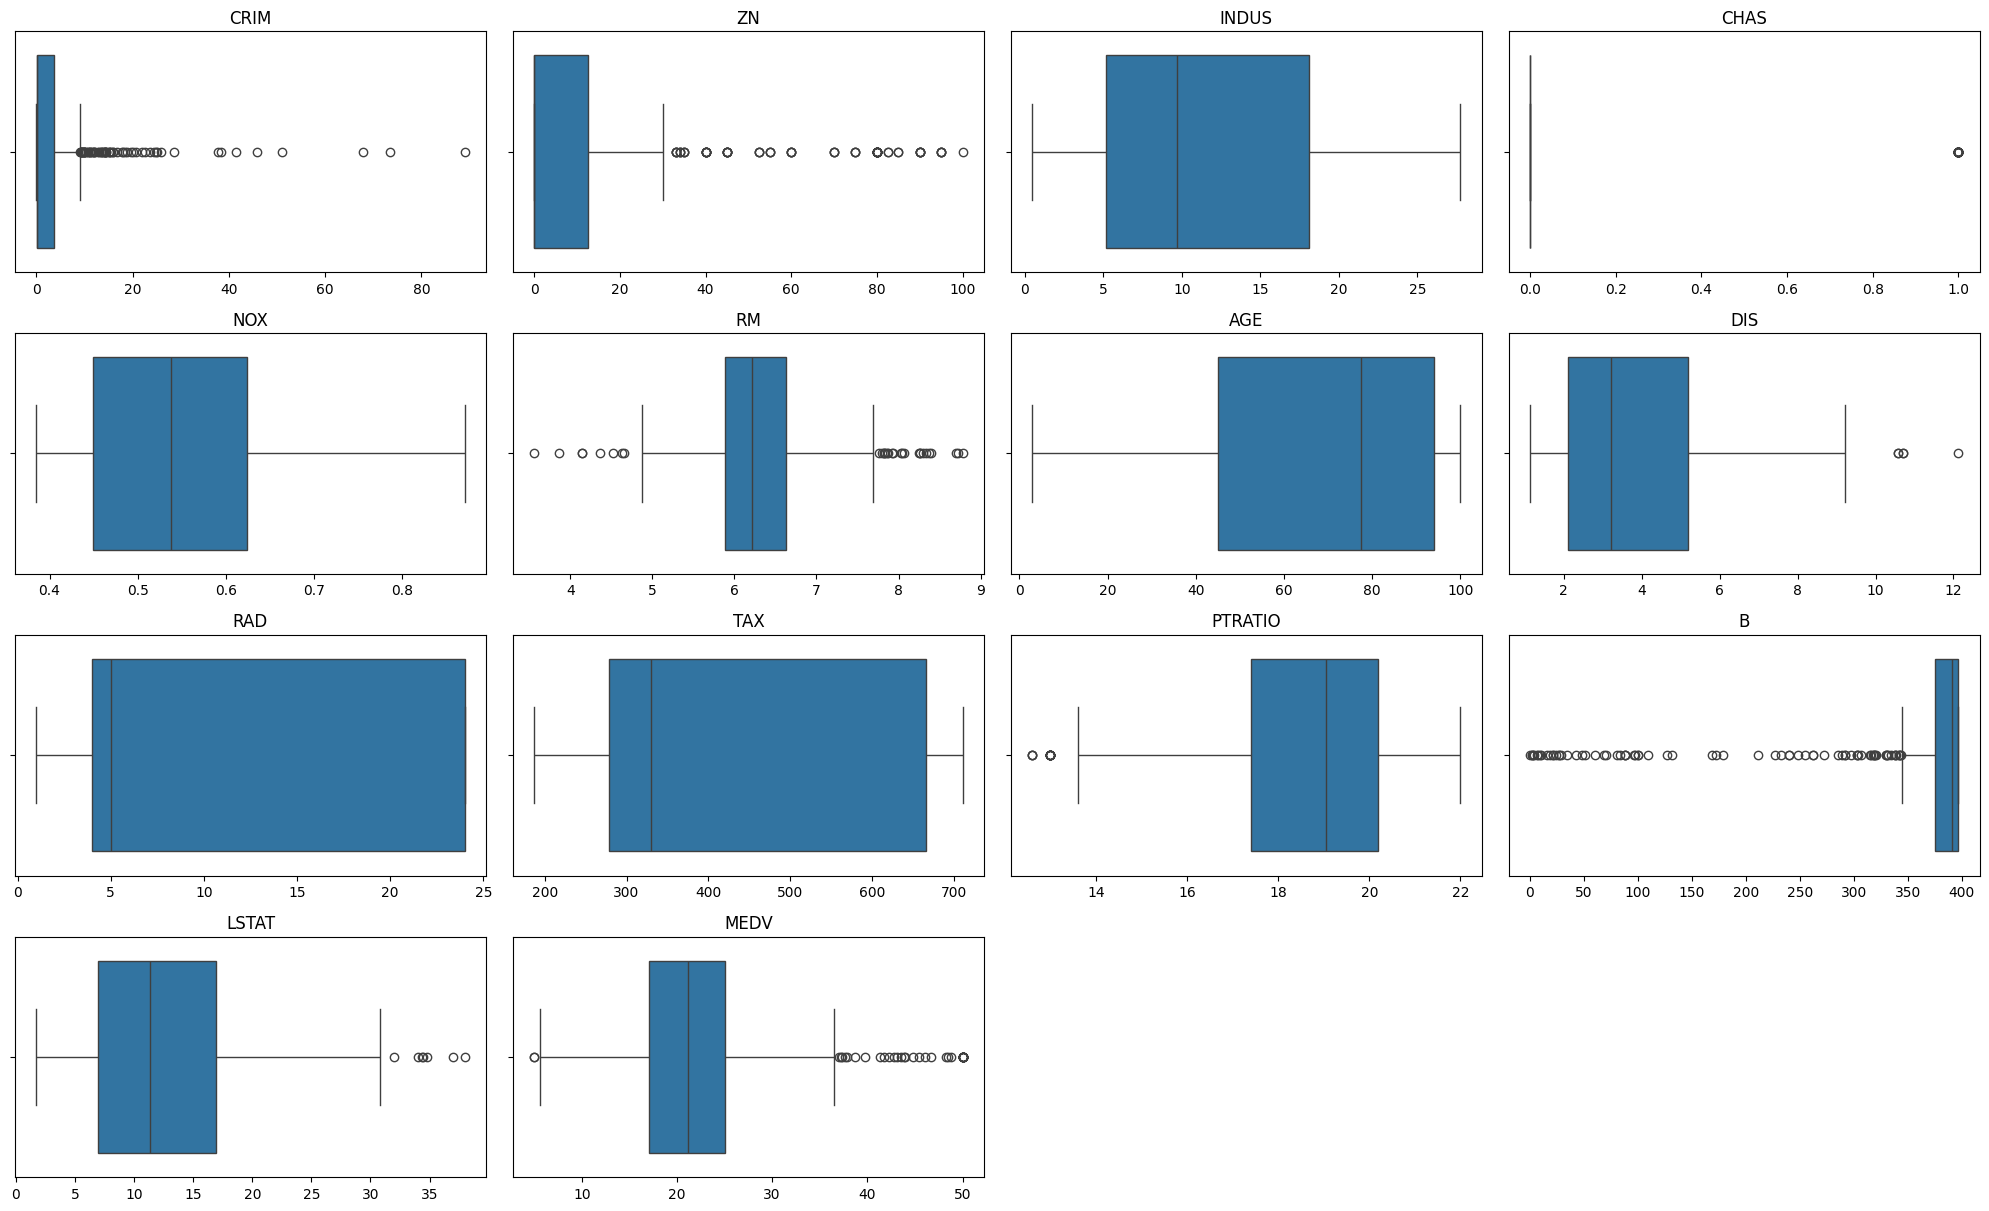

In [ ]:

# Crear gráficos de boxplot para cada columna
plt.figure(figsize=(20, 15))
for i, column in enumerate(df):
    plt.subplot(5, 4, i + 1)  # 5 filas, 4 columnas
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

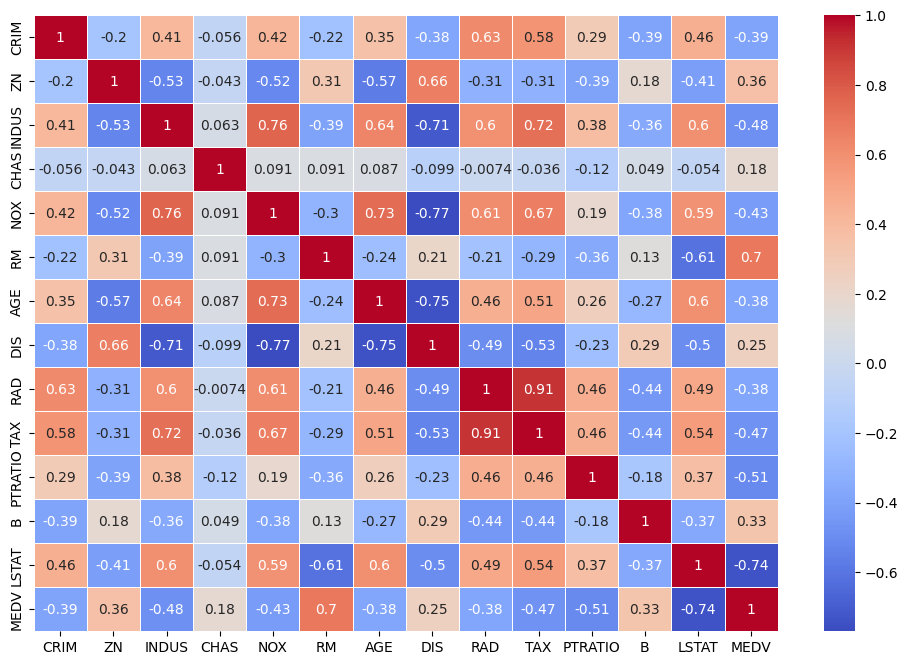

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Generar un heatmap de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.show()

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix['MEDV'].sort_values(ascending=False))

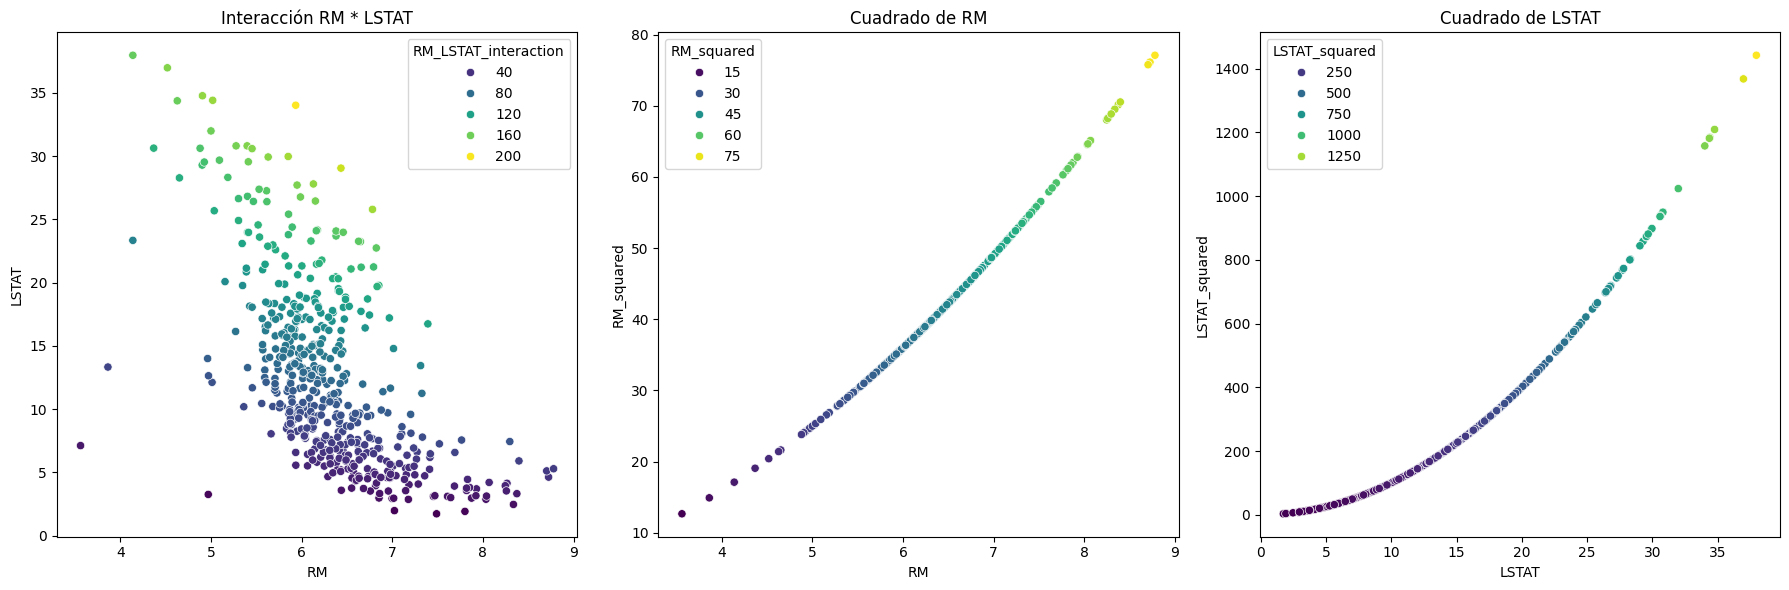

In [13]:
# Seleccionar características importantes y variable objetivo
features = df.drop(columns=['MEDV']).copy()
features['RM_LSTAT_interaction'] = features['RM'] * features['LSTAT']
features['RM_squared'] = features['RM']**2
features['LSTAT_squared'] = features['LSTAT']**2

# Estandarizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Supongamos que 'features' es el DataFrame con las nuevas características generadas
plt.figure(figsize=(18, 6))

# Interacción RM * LSTAT
plt.subplot(1, 3, 1)
sns.scatterplot(x=features['RM'], y=features['LSTAT'], hue=features['RM_LSTAT_interaction'], palette='viridis')
plt.title('Interacción RM * LSTAT')
plt.xlabel('RM')
plt.ylabel('LSTAT')

# Cuadrado de RM
plt.subplot(1, 3, 2)
sns.scatterplot(x=features['RM'], y=features['RM_squared'], hue=features['RM_squared'], palette='viridis')
plt.title('Cuadrado de RM')
plt.xlabel('RM')
plt.ylabel('RM_squared')

# Cuadrado de LSTAT
plt.subplot(1, 3, 3)
sns.scatterplot(x=features['LSTAT'], y=features['LSTAT_squared'], hue=features['LSTAT_squared'], palette='viridis')
plt.title('Cuadrado de LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('LSTAT_squared')

plt.tight_layout()
plt.show()

In [10]:
# Variable objetivo
target = df['MEDV']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 13.918094111659562
Root Mean Squared Error (RMSE): 3.7306961966447445
R^2 Score: 0.8102089717472818
